Import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd # for loading the Excel data set file
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.experimental import LinearModel

np.random.seed(1)
tf.random.set_seed(1)

Implementation of a callback function that allows to evaluate the functional $J(\omega)$ after each update step

In [2]:
class BatchHistory(keras.callbacks.Callback):
    loss_per_batch = []
    def __init__(self):
        self.loss_per_batch = []
    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        self.loss_per_batch.append(logs["loss"])

Implementation of function that carries out stochastich gradient descent such that it returns the evolution of the functional $J({\omega})$

In [3]:
def stochastic_gradient(X,y,lr):
    model = LinearModel()
    opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0)
    model.compile(optimizer=opt, loss='mse')
    cb = BatchHistory()
    model.fit(X, y, batch_size=1, epochs=5, verbose=0,callbacks=[cb])

    J_omegas = np.asarray(cb.loss_per_batch)
    ns = np.linspace(1,len(cb.loss_per_batch),len(cb.loss_per_batch))
    
    return J_omegas, ns

Implementation of function that carries out mini-batch gradient descent such that it returns the evolution of the functional $J({\omega})$

In [4]:
def minibatch_gradient(X,y,lr):

    N_b = 10  # needs to divide the training set size without remainder

    model = LinearModel()
    opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0)
    model.compile(optimizer=opt, loss='mse')
    cb = BatchHistory()
    history = model.fit(X, y, batch_size=N_b, epochs=5, verbose=0,callbacks=[cb])

    J_omegas = np.asarray(cb.loss_per_batch)
    ns = np.linspace(1,len(cb.loss_per_batch),len(cb.loss_per_batch))*N_b
    
    return J_omegas, ns

Implementation of function that carries out batch gradient descent such that it returns the evolution of the functional $J({\omega})$

In [5]:
def batch_gradient(X,y,lr):

    N_b = X.shape[0]

    model = LinearModel()
    opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0)
    model.compile(optimizer=opt, loss='mse')
    cb = BatchHistory()
    history = model.fit(X, y, batch_size=N_b, epochs=5, verbose=0,callbacks=[cb])

    J_omegas = np.asarray(cb.loss_per_batch)
    ns = np.linspace(1,len(cb.loss_per_batch),len(cb.loss_per_batch))*N_b
    
    return J_omegas, ns

Download and load the energy efficiency data set, furthermore scale the inputs

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx
data_set = pd.read_excel('ENB2012_data.xlsx')
data_set_np = np.array(data_set)

N= 200

X = data_set_np[:N,:8]
y = data_set_np[:N,8]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Plot magnitude of $J(\omega)$ during stochastic gradient descent for different learning rates

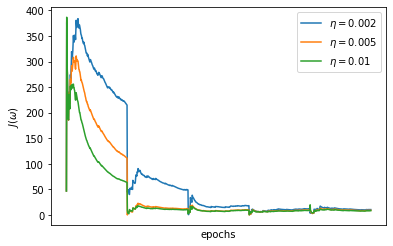

In [7]:
plt.figure()

#history = stochastic_gradient(X, y,0.002)

errors, ns = stochastic_gradient(X, y,0.002)
plt.plot(ns,errors, label="$\eta=0.002$")

errors, ns = stochastic_gradient(X, y,0.005)
plt.plot(ns,errors, label="$\eta=0.005$")

errors, ns = stochastic_gradient(X, y,0.01)
plt.plot(ns,errors, label="$\eta=0.01$")

plt.xlabel("epochs")
plt.ylabel("$J(\omega)$")
plt.xticks(ticks=[])

plt.legend()
plt.show()

Plot magnitude of $J(\omega)$ during during gradient descent by different methods

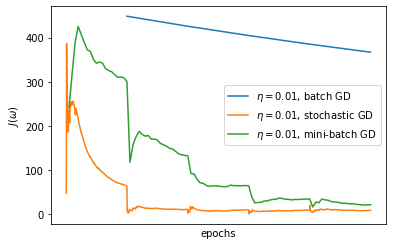

In [8]:
plt.figure()

errors, ns = batch_gradient(X, y,0.01)
plt.plot(ns,errors, label="$\eta=0.01$, batch GD")

errors, ns = stochastic_gradient(X, y,0.01)
plt.plot(ns,errors, label="$\eta=0.01$, stochastic GD")

errors, ns = minibatch_gradient(X, y,0.01)
plt.plot(ns,errors, label="$\eta=0.01$, mini-batch GD")

plt.xlabel("epochs")
plt.ylabel("$J(\omega)$")
plt.xticks(ticks=[])

plt.legend()
plt.show()